In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [3]:
path = r"Data\train.csv"
path_2 = r"Data\train_full.csv"

In [4]:
data = pd.read_csv(path)
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0


In [5]:
X = data.drop(columns="price_range")
y = data["price_range"]

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
model = LinearSVC(random_state=0)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
accuracy

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.86

In [8]:
c_model_1 = LinearSVC(C=4, random_state=0)
c_model_1.fit(X_train, y_train)
acc_1 = c_model_1.score(X_test, y_test)
c_model_2 = LinearSVC(C=0.01, random_state=0)
c_model_2.fit(X_train, y_train)
acc_2 = c_model_2.score(X_test, y_test)
c_model_3 = LinearSVC(C=0.005, random_state=0)
c_model_3.fit(X_train, y_train)
acc_3 = c_model_3.score(X_test, y_test)
acc_1, acc_2, acc_3

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


(0.86, 0.89, 0.77)

In [9]:
from sklearn.svm import SVC

In [10]:
poly_model = SVC(random_state=0, kernel="poly")
poly_model.fit(X_train, y_train)
acc_poly = poly_model.score(X_test, y_test)
rbf_model = SVC(random_state=0, kernel="rbf")
rbf_model.fit(X_train, y_train)
acc_rbf = rbf_model.score(X_test, y_test)
acc_poly, acc_rbf

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.9883333333333333, 0.4766666666666667)

In [11]:
data_multi = pd.read_csv(path_2)
data_multi.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [12]:
X = data_multi.drop(columns="price_range")
y = data_multi["price_range"]

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [14]:
model_ova = SVC(random_state=0, kernel="linear", decision_function_shape="ova")
model_ova.fit(X_train, y_train)
acc_ova = model_ova.score(X_test, y_test)
model_ovo = SVC(random_state=0, kernel="linear", decision_function_shape="ovo")
model_ovo.fit(X_train, y_train)
acc_ovo = model_ovo.score(X_test, y_test)
acc_ova, acc_ovo

(0.9783333333333334, 0.9783333333333334)

## Human Activity Recognition with Smartphones

In [15]:
path = r"Data\Human_activity_recognition.csv"

In [16]:
data = pd.read_csv(path)
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [17]:
data.isnull().sum()[data.isnull().sum()>0]

Series([], dtype: int64)

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style(style='darkgrid')

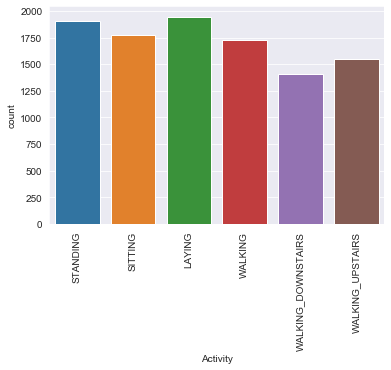

In [19]:
label = data['Activity']
sns.countplot(x=label)
plt.xticks(rotation=90)
plt.show()

In [42]:
data_copy = data.copy()
data_copy["duration"] = ""

In [44]:
duration_df = (data_copy.groupby([label[label.isin(['WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'])], 'subject'])['duration'].count() * 1.28)
duration_df = pd.DataFrame(duration_df)

In [45]:
plot_data = duration_df.reset_index().sort_values('duration', ascending=False)
plot_data['Activity'] = plot_data['Activity'].map({'WALKING_UPSTAIRS':'Upstairs', 'WALKING_DOWNSTAIRS':'Downstairs'})

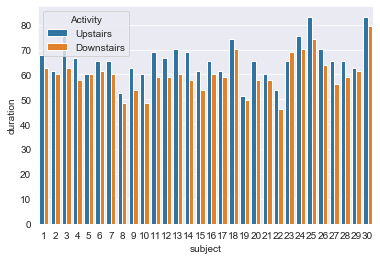

In [47]:
sns.barplot(data=plot_data, x='subject', y='duration', hue='Activity')

In [97]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,2
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,2
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,2
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,2
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,2


In [52]:
feature_cols = data.select_dtypes(exclude='object').columns.drop("subject")

In [54]:
correlated_values = data.corr()
correlated_values = pd.DataFrame(correlated_values.stack()).reset_index()

In [56]:
correlated_values.columns = ["Feature_1", "Feature_2", "Correlation_score"]

In [113]:
correlated_values["abs_correlation"] = abs(correlated_values["Correlation_score"])
top_corr_fields = correlated_values.sort_values("Correlation_score", ascending=False)
top_corr_fields = top_corr_fields[top_corr_fields['Feature_1'] != top_corr_fields['Feature_2']].reset_index(drop=True)
top_corr_fields = top_corr_fields[top_corr_fields["abs_correlation"]>0.8]

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as error_metric
from sklearn.metrics import confusion_matrix, accuracy_score

In [34]:
le = LabelEncoder()
data["Activity"] = le.fit_transform(data["Activity"])

In [35]:
X = data.drop(columns="Activity")
y = data["Activity"]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [37]:
classifier = SVC()
clf = classifier.fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
precision, accuracy, f1_score, na = error_metric(y_test, y_pred, average='weighted')

In [39]:
model1_score = clf.score(X_test, y_test)
model1_score, precision, accuracy, f1_score

(0.9511326860841424,
 0.9509872667104282,
 0.9511326860841424,
 0.9510435802284054)

In [115]:
lsvc = LinearSVC(C = 0.01, penalty = 'l1', dual = False, random_state =42)
lsvc.fit(X_train, y_train)

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=42, tol=0.0001,
          verbose=0)

In [116]:
from sklearn.feature_selection import SelectFromModel

In [117]:
model_2 = SelectFromModel(lsvc, prefit=True)

In [120]:
new_train_features = model_2.transform(X_train)
new_test_features = model_2.transform(X_test)

In [138]:
classifier_2 = SVC()

In [139]:
clf_2 = classifier_2.fit(new_train_features, y_train)

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [140]:
y_pred_new = clf_2.predict(new_test_features)
model2_score = accuracy_score(y_test, y_pred_new)

In [141]:
model2_score

0.9686084142394822

In [142]:
from sklearn.metrics import f1_score

In [143]:
X_test.shape, new_test_features.shape, y_test.shape

((3090, 562), (3090, 110), (3090,))

In [151]:
precision, recall, f_score, ot = error_metric(y_test, y_pred_new)

In [155]:
f_score

array([0.99913719, 0.91434071, 0.92413793, 0.99426386, 0.99270073,
       0.99580713])

In [161]:
from sklearn.metrics import f1_score

In [162]:
f1_score(y_test, y_pred_new, average='weighted')

0.9685926760840549

In [163]:
from sklearn.model_selection import GridSearchCV

In [165]:
parameters = {'kernel': ['linear', 'rbf'], 'C': [100, 20, 1, 0.1]}

In [166]:
selector = GridSearchCV(SVC(), scoring='accuracy', param_grid=parameters)

In [167]:
selector.fit(new_train_features, y_train)

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [100, 20, 1, 0.1], 'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [172]:
params = selector.best_params_

In [174]:
means = selector.cv_results_['mean_test_score']
stds = selector.cv_results_['std_test_score']
means, stds, params

(array([0.98085726, 0.98626717, 0.98127341, 0.9857123 , 0.98085726,
        0.96074352, 0.97655708, 0.88514357]),
 array([1.89614566e-03, 1.56032197e-03, 6.36296274e-06, 2.88576334e-03,
        2.03523770e-03, 3.42876115e-03, 3.39958236e-03, 1.76843085e-03]),
 {'C': 100, 'kernel': 'rbf'})

In [176]:
for mean, std, params in zip(means, stds, selector.cv_results_['params']):

    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))

    print()

0.981 (+/-0.004) for {'C': 100, 'kernel': 'linear'}

0.986 (+/-0.003) for {'C': 100, 'kernel': 'rbf'}

0.981 (+/-0.000) for {'C': 20, 'kernel': 'linear'}

0.986 (+/-0.006) for {'C': 20, 'kernel': 'rbf'}

0.981 (+/-0.004) for {'C': 1, 'kernel': 'linear'}

0.961 (+/-0.007) for {'C': 1, 'kernel': 'rbf'}

0.977 (+/-0.007) for {'C': 0.1, 'kernel': 'linear'}

0.885 (+/-0.004) for {'C': 0.1, 'kernel': 'rbf'}



In [186]:
params

{'C': 0.1, 'kernel': 'rbf'}

In [185]:
SVC(selector.best_params_)

SVC(C={'C': 100, 'kernel': 'rbf'}, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [179]:
classifier_3 = SVC(C=0.1, kernel='rbf')
clf_3 = classifier_3.fit(new_train_features, y_train)
y_pred_final = clf_3.predict(new_test_features)
model3_score = clf_3.score(new_test_features, y_test)
f_score = f1_score(y_test, y_pred_final, average='weighted')

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [180]:
model3_score, f_score

(0.9097087378640777, 0.909258987850101)